In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


colors = ["#0073C2FF","#EFC000FF", "#868686FF" ,"#CD534CFF","#7AA6DCFF","#003C67FF","#8F7700FF", "#3B3B3BFF", "#A73030FF", "#4A6990FF"]
# Set your custom color palette
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", palette=sns.color_palette(colors), font="times new roman", rc=custom_params, font_scale=1)
sns.color_palette(colors)

[(0.0, 0.45098039215686275, 0.7607843137254902),
 (0.9372549019607843, 0.7529411764705882, 0.0),
 (0.5254901960784314, 0.5254901960784314, 0.5254901960784314),
 (0.803921568627451, 0.3254901960784314, 0.2980392156862745),
 (0.47843137254901963, 0.6509803921568628, 0.8627450980392157),
 (0.0, 0.23529411764705882, 0.403921568627451),
 (0.5607843137254902, 0.4666666666666667, 0.0),
 (0.23137254901960785, 0.23137254901960785, 0.23137254901960785),
 (0.6549019607843137, 0.18823529411764706, 0.18823529411764706),
 (0.2901960784313726, 0.4117647058823529, 0.5647058823529412)]

## Descriptor Applicability Modeling

In [96]:
## raw psychophysical files
dravdf = pd.read_csv("../data/dravnieks/raw/dravnieks_pa.csv").iloc[:,4:]
kellerdf = pd.read_csv("../data/keller/raw/keller_pa.csv").iloc[:,1:]

dravdescriptor = dravdf.columns.values
kellerdescriptor = kellerdf.columns.values


In [97]:
## descriptor matching pairs and their index
kellermatch = ["SWEET ", "GARLIC ", "SWEATY ", "DECAYED", "GRASS "]
dravmatch = [ "SWEET", "GARLIC, ONION", "SWEATY", "PUTRID, FOUL, DECAYED","HERBAL, GREEN,CUTGRASS"]

assert len(kellermatch)==len(dravmatch)

kellerind = []
dravind = []
for i,_ in enumerate(dravdescriptor):
    if dravdescriptor[i] in dravmatch:
        dravind +=[i]
    if i<len(kellerdescriptor):
        if kellerdescriptor[i] in kellermatch:
            kellerind +=[i]

Compare the modeling performance of GNN with classical ML from Mordred

In [98]:
methods = ["Support Vector Machine", "K-Neighbors", "Gradient Boosting", "Random Forest", "Graph Neural Networks"]

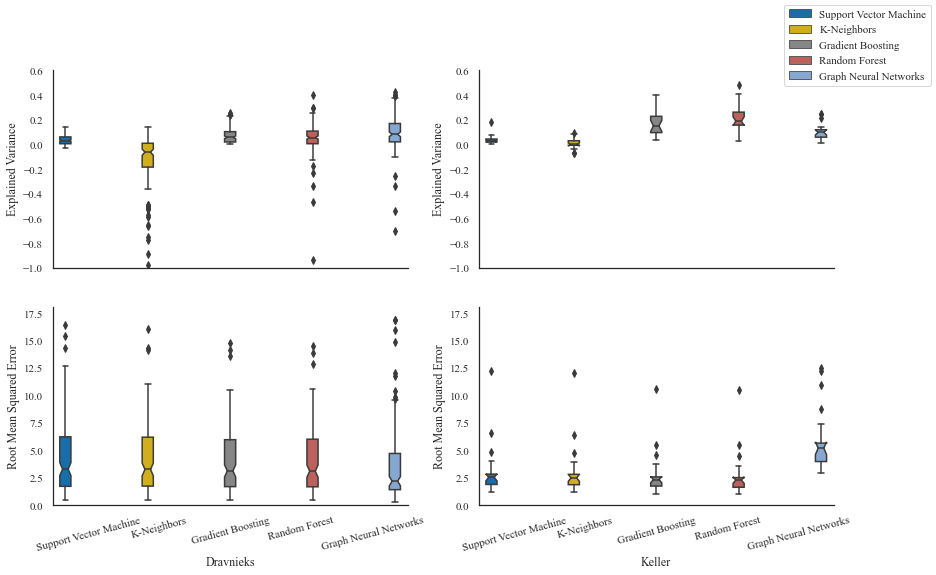

In [143]:
dravgnndf = pd.read_csv("dravnieks/gnn_regr/1413.csv").iloc[:,1:]
dravgnndf.columns = ['loss','explained_variance','explained_variance_weighted','corr','neg_mean_squared_error']
dravgnndf.neg_mean_squared_error = -dravgnndf.neg_mean_squared_error.values

dravlm = pd.read_csv("dravnieks/metrics/LinearRegression.csv").iloc[:,1:]
dravsvr = pd.read_csv("dravnieks/metrics/SVR.csv").iloc[:,1:]
dravknn = pd.read_csv("dravnieks/metrics/KNeighborsRegressor.csv").iloc[:,1:]
dravxgb = pd.read_csv("dravnieks/metrics/GradientBoostingRegressor.csv").iloc[:,1:]
dravrfr = pd.read_csv("dravnieks/metrics/RandomForestRegressor.csv").iloc[:,1:]

dfplotdrav = pd.concat([dravsvr,dravknn, dravxgb, dravrfr, dravgnndf[["explained_variance", "neg_mean_squared_error"]]], axis=0)
dfplotdrav["Methods"] = np.repeat(methods, dravgnndf.shape[0])
dfplotdrav["Odor Descriptors"] = np.tile(dravdescriptor, 5)

fig, axes = plt.subplots(2,2,figsize=(14,8), sharex=True)
g = sns.boxplot(data=dfplotdrav, x="Methods", y="explained_variance", hue="Methods", notch=True, ax=axes[0,0])
g.set_ylim(-1,.6)
g.set_ylabel("Explained Variance")
g.set_xlabel("")

f = sns.boxplot(data=dfplotdrav, x="Methods", y=np.sqrt(-dfplotdrav.neg_mean_squared_error.values), hue="Methods", notch=True, ax=axes[1,0])
f.set_ylim(0,18)
f.set_ylabel("Root Mean Squared Error")
f.set_xlabel("Dravnieks")
f.set_xticklabels(f.get_xticklabels(), rotation=15)

kellergnndf = pd.read_csv("keller/gnn_regr/1440.csv").iloc[:,1:]
kellergnndf.columns = ['loss','explained_variance','explained_variance_weighted','corr','neg_mean_squared_error']
kellergnndf.neg_mean_squared_error = -kellergnndf.neg_mean_squared_error.values

kellerlm = pd.read_csv("keller/metrics/LinearRegression.csv").iloc[:,1:]
kellersvr = pd.read_csv("keller/metrics/SVR.csv").iloc[:,1:]
kellerknn = pd.read_csv("keller/metrics/KNeighborsRegressor.csv").iloc[:,1:]
kellerxgb = pd.read_csv("keller/metrics/GradientBoostingRegressor.csv").iloc[:,1:]
kellerrfr = pd.read_csv("keller/metrics/RandomForestRegressor.csv").iloc[:,1:]

dfplotkeller = pd.concat([kellersvr,kellerknn, kellerxgb, kellerrfr, kellergnndf[["explained_variance", "neg_mean_squared_error"]]], axis=0)
dfplotkeller["Methods"] = np.repeat(methods, kellergnndf.shape[0])
dfplotkeller["Odor Descriptors"] = np.tile(kellerdescriptor, 5)

g = sns.boxplot(data=dfplotkeller, x="Methods", y="explained_variance", hue="Methods", notch=True, ax=axes[0,1])
g.set_ylim(-1,.6)
g.set_ylabel("Explained Variance")
g.set_xlabel("")

f = sns.boxplot(data=dfplotkeller, x="Methods", y=np.sqrt(-dfplotkeller.neg_mean_squared_error.values), hue="Methods", notch=True, ax=axes[1,1])
f.set_ylim(0,18)
f.set_ylabel("Root Mean Squared Error")
f.set_xlabel("Keller")
f.set_xticklabels(f.get_xticklabels(), rotation=15)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

for i,ax in enumerate(axes):
    ax[0].legend([],[], frameon=False)
    ax[1].legend([],[], frameon=False)

fig.legend(lines[:5], labels[:5], loc=1)
fig.savefig("figs/OverallPerformance.png")

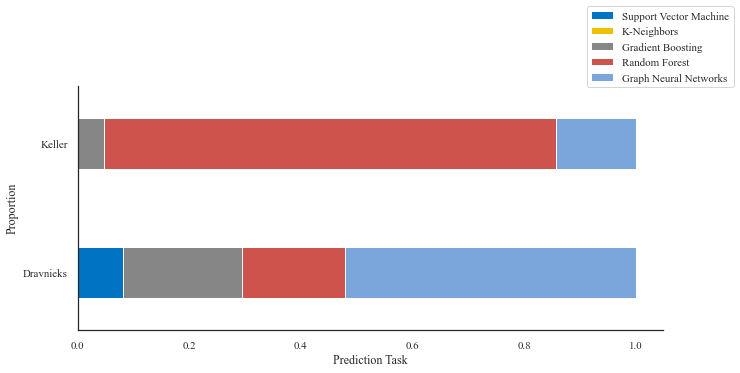

In [151]:
countperform = pd.DataFrame(np.zeros((2, len(methods))),columns=methods)
for i, _ in enumerate(dravdescriptor):
    posd = dfplotdrav[dfplotdrav["Odor Descriptors"]==dravdescriptor[i]]["explained_variance"].argmax()
    countperform[methods[posd]].loc[0] += 1/len(dravdescriptor)
    if i<len(kellerdescriptor):
        posk = dfplotkeller[dfplotkeller["Odor Descriptors"]==kellerdescriptor[i]]["explained_variance"].argmax()
        countperform[methods[posk]].loc[1] += 1/len(kellerdescriptor)
fig, ax = plt.subplots(figsize=(10.5,4.5))
(countperform).index = ["Dravnieks", "Keller"]
countperform.plot(kind="barh", stacked=True, ax=ax, legend=False, width=.4)
ax.set_ylabel("Proportion")
ax.set_xlabel("Prediction Task")
fig.legend(methods, loc=5, bbox_to_anchor=(1,1))
fig.savefig("figs/BestPerformingMethods.png")

## Embeddings as input

In [102]:
kellerembxgb = pd.read_csv("keller/embeddings/metrics/GradientBoostingRegressor.csv")
kellerembrfr = pd.read_csv("keller/embeddings/metrics/RandomForestRegressor.csv")
kellerembsvr = pd.read_csv("keller/embeddings/metrics/SVR.csv")
kellerembknn = pd.read_csv("keller/embeddings/metrics/KNeighborsRegressor.csv")

dravembxgb = pd.read_csv("dravnieks/embeddings/metrics/GradientBoostingRegressor.csv")
dravembrfr = pd.read_csv("dravnieks/embeddings/metrics/RandomForestRegressor.csv")
dravembsvr = pd.read_csv("dravnieks/embeddings/metrics/SVR.csv")
dravembknn = pd.read_csv("dravnieks/embeddings/metrics/KNeighborsRegressor.csv")

In [103]:
dravemb = [dravembsvr,dravembknn,dravembrfr,dravembxgb]
kelleremb = [kellerembsvr,kellerembknn,kellerembxgb,kellerembrfr]
dravmordred = [dravsvr,dravknn,dravrfr,dravxgb]
kellermordred = [kellersvr,kellerknn,kellerxgb,kellerrfr]

/Users/rui/miniforge3/lib/python3.8/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/rui/miniforge3/lib/python3.8/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/rui/miniforge3/lib/python3.8/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/rui/miniforge3/lib/python3.8/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/rui/miniforge3/lib/python3.8/site-packages/seaborn/axisgrid.py:703: FutureWarning: it

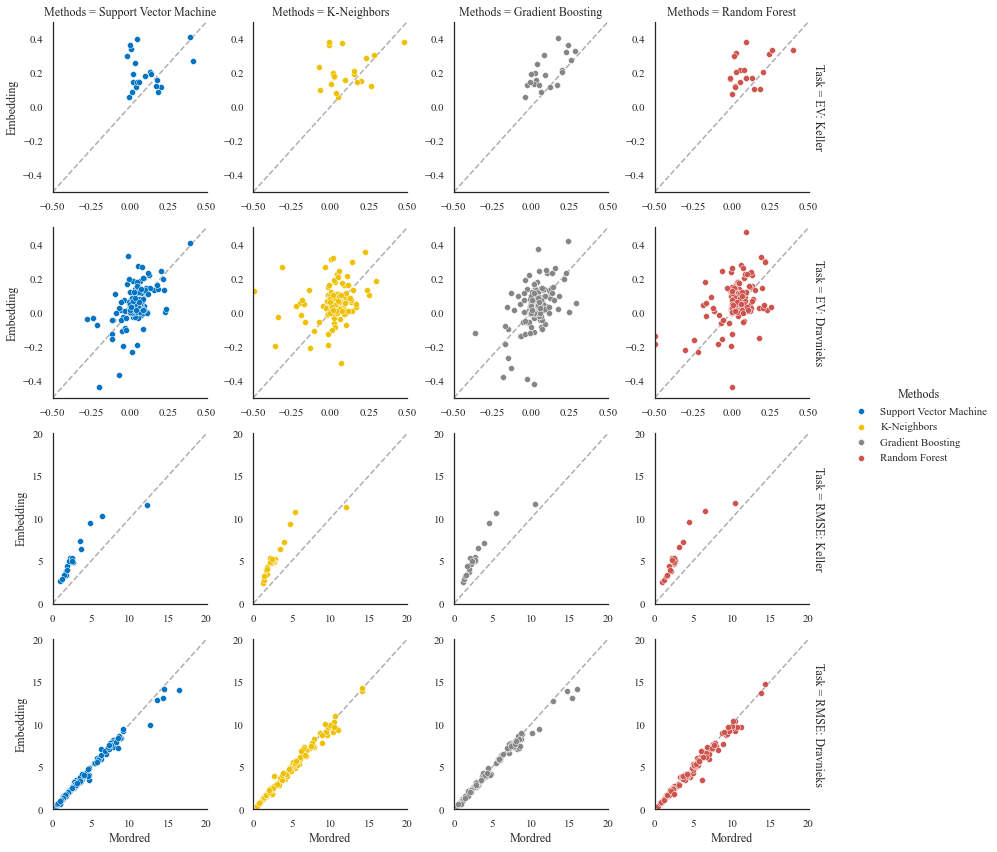

In [241]:
dfplot = pd.DataFrame()
embedding, embrmse = [],[]
for df in kelleremb+dravemb:
    embedding+=df.explained_variance.tolist()
    embrmse += np.sqrt(-df.neg_mean_squared_error).tolist()

mordred, morrmse = [], []
for df in kellermordred+dravmordred:
    mordred+=df.explained_variance.tolist()
    morrmse += np.sqrt(-df.neg_mean_squared_error).tolist()

dfplot["Embedding"] = embedding+embrmse
dfplot["Mordred"]=mordred+morrmse
dfplot["Methods"] = methods[:4]*(kellerknn.shape[0]+dravknn.shape[0])*2
dfplot["Task"]=(list(np.repeat("EV: Keller", 4*kellerknn.shape[0]))+list(np.repeat("EV: Dravnieks", 4*dravknn.shape[0])))+(list(np.repeat("RMSE: Keller", 4*kellerknn.shape[0]))+list(np.repeat("RMSE: Dravnieks", 4*dravknn.shape[0])))

# fig, ax=plt.subplots(figsize=(12,8))
g = sns.FacetGrid(dfplot, col="Methods", row="Task", hue="Methods",margin_titles=True, height=3, aspect=1, sharex=False, sharey= False)
g.map(sns.scatterplot,  "Mordred", "Embedding")
for i, ax in enumerate(g.axes.flat):
    ax.axline((0, 0), slope=1, c=".2", ls="--", zorder=0, alpha=.4)
    if i<8:
        ax.set_xlim(-.5,.5)
        ax.set_ylim(-.5,.5)
    else:
        ax.set_xlim(0,20)
        ax.set_ylim(0, 20)
g.add_legend()
g.savefig("figs/EmbedMordred.png")

In [210]:
from scipy.stats import pearsonr
print("-"*35+"Dravnieks prediction task"+"-"*35)
ratiomse, ratioev = [],[]
for i, (df1, df2) in enumerate(zip(kelleremb, kellermordred)):
    ratiomse +=[np.mean((-df1.neg_mean_squared_error)< -df2.neg_mean_squared_error)]
    ratioev += [np.mean(df1.explained_variance>df2.explained_variance)]
print(pd.DataFrame({"Methods": methods[:4], "EV": ratioev, "MSE": ratiomse}))

print("-"*35+"Keller prediction task"+"-"*35)

ratiomse, ratioev = [],[]
for i, (df1, df2) in enumerate(zip(dravemb, dravmordred)):
    ratiomse +=[np.mean((-df1.neg_mean_squared_error)< -df2.neg_mean_squared_error)]
    ratioev += [np.mean(df1.explained_variance>df2.explained_variance)]
print(pd.DataFrame({"Methods": methods[:4], "EV": ratioev, "MSE": ratiomse}))

-----------------------------------Dravnieks prediction task-----------------------------------
                  Methods        EV       MSE
0  Support Vector Machine  1.000000  0.047619
1             K-Neighbors  1.000000  0.047619
2       Gradient Boosting  0.809524  0.000000
3           Random Forest  0.523810  0.000000
-----------------------------------Keller prediction task-----------------------------------
                  Methods        EV       MSE
0  Support Vector Machine  0.712329  0.732877
1             K-Neighbors  0.623288  0.698630
2       Gradient Boosting  0.369863  0.369863
3           Random Forest  0.554795  0.486301


In [603]:
import os
path = "../results/transfer_ml/gnn/"
filelist = os.listdir(path)

WEV = -np.inf
for fname in filelist:
    if ".csv" in fname:
        df = pd.read_csv(path+fname).iloc[:,1:]
    newWEV = np.unique(df.explained_variance_weighted.values)
    if newWEV>WEV:
        WEV=newWEV
        tlgnn=df

tlgnn.head()

,loss,explained_variance,explained_variance_weighted,corr,mse
0,3.829811,0.229958,0.13207,0.515243,187.468670
1,3.829811,0.038598,0.13207,0.257319,59.587744
2,3.829811,0.042926,0.13207,0.262465,12.512047
3,3.829811,0.145267,0.13207,0.448126,186.684722
4,3.829811,0.106248,0.13207,0.423041,90.895811


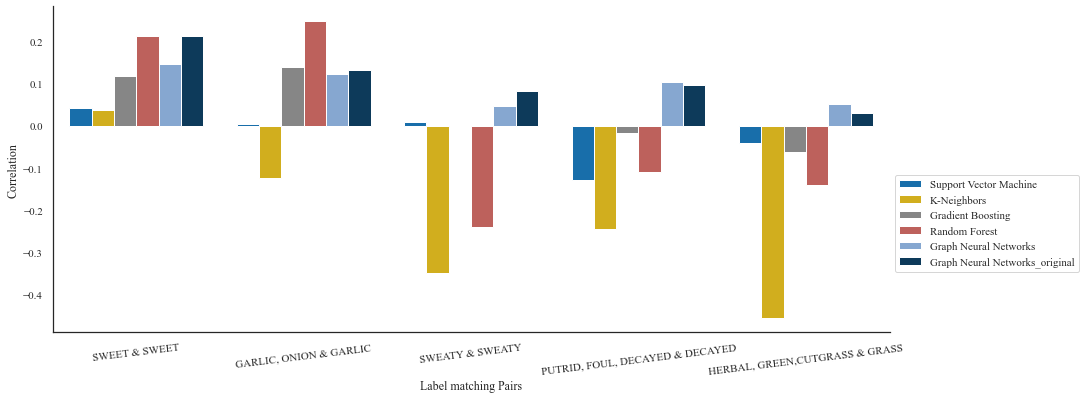

In [604]:
mordredtlxgb = pd.read_csv("transfer_ml/mordred/GradientBoostingRegressor.csv").iloc[:,1:]
mordredtlrfr = pd.read_csv("transfer_ml/mordred/RandomForestRegressor.csv").iloc[:,1:]
mordredtlknn = pd.read_csv("transfer_ml/mordred/KNeighborsRegressor.csv").iloc[:,1:]
mordredtlsvr = pd.read_csv("transfer_ml/mordred/SVR.csv").iloc[:,1:]

mordredtl = [mordredtlsvr, mordredtlknn, mordredtlxgb,mordredtlrfr]

label = []
for i in range(mordredtlsvr.shape[0]):
    label+=[mordredtlsvr.drav_label.loc[i]+" & "+mordredtlsvr.keller_label.loc[i]]

mse, ev, corr = [],[], []
for df in mordredtl + [tlgnn]+ [kellergnndf]:
    if df.shape[0]!=len(label):
        df = df.iloc[kellerind,:]
    ev += df.explained_variance.tolist()
    corr +=df["corr"].tolist()
    if "mse" in df.columns.values:
        mse += list(np.sqrt(df.mse.values))
    else:
        mse += list(np.sqrt(-df.neg_mean_squared_error.values))

originalmethods = []
for item in methods:
    originalmethods += [item+ "_original"]

dftlplot = pd.DataFrame()
dftlplot["Values"] = ev + mse+ corr
dftlplot["Metrics"] = np.repeat(["EV","MSE", "CORR"], len(ev))
dftlplot["Label"] = label*6*3
dftlplot["Methods"] = list(np.repeat((methods + [originalmethods[-1]]),mordredtlsvr.shape[0]))*3

sns.set(rc={'figure.figsize':(15,6)})
sns.set_theme(style="white", palette=sns.color_palette(colors), font="times new roman", rc=custom_params, font_scale=1)
g = sns.barplot(data=dftlplot[dftlplot["Metrics"]=="EV"], x="Label", y="Values", hue="Methods")
g.set_xticklabels(labels=label, rotation=7)
g.set_ylabel("Correlation")
g.set_xlabel("Label matching Pairs")
g.legend(loc=2,bbox_to_anchor=(1,.5))
# g.add_legend()
fig = g.get_figure()
fig.savefig("figs/TransferLearningOn7EV.png")

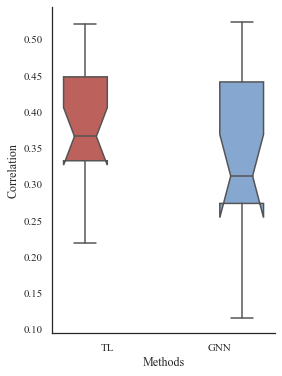

In [649]:
mse, ev, corr = [],[], []
for df in [tlgnn, kellergnndf]:
    ev += df.explained_variance.tolist()
    corr +=df["corr"].tolist()

dftlplot = pd.DataFrame()
dftlplot["Values"] = ev +corr
dftlplot["Metrics"] = np.repeat(["EV", "CORR"], len(ev))
dftlplot["Methods"] = np.repeat(["TL", "GNN"],kellergnndf.shape[0]).tolist()*2

## plot all them out
sns.set(rc={'figure.figsize':(4,6)})
sns.set_theme(style="white", palette=sns.color_palette(colors[3:5]), font="times new roman", rc=custom_params, font_scale=1)
g = sns.boxplot(data=dftlplot[dftlplot["Metrics"]=="CORR"], y="Values", hue = "Methods", x = "Methods", notch=True, whis=2)
g.set_ylabel("Correlation")
g.legend("", frameon=False)

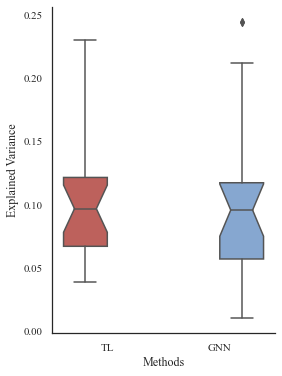

In [657]:
g = sns.boxplot(data=dftlplot[dftlplot["Metrics"]=="EV"], y="Values", hue = "Methods", x = "Methods", notch=True, whis=2)
g.set_ylabel("Explained Variance")
g.legend("", frameon=False)

In [684]:
path = "../results/transfer_ml/gnn_reverse/"
filelist = os.listdir(path)

WEV = -np.inf
for fname in filelist:
    if ".csv" in fname:
        df = pd.read_csv(path+fname).iloc[:,1:]
    newWEV = np.unique(df.explained_variance_weighted.values)
    if newWEV>WEV:
        WEV=newWEV
        tlgnndrav=df

tlgnndrav.head()

,loss,explained_variance,explained_variance_weighted,corr,mse
0,1.705763,0.134789,0.126696,0.471569,51.024550
1,1.705763,0.051977,0.126696,0.306516,85.054891
2,1.705763,0.078733,0.126696,0.314358,0.884764
3,1.705763,0.260175,0.126696,0.586065,6.544243
4,1.705763,0.243568,0.126696,0.676799,161.820677


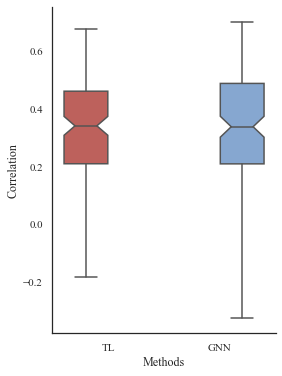

In [685]:
mse, ev, corr = [],[], []
for df in [tlgnndrav, dravgnndf]:
    ev += df.explained_variance.tolist()
    corr +=df["corr"].tolist()

dftlplot = pd.DataFrame()
dftlplot["Values"] = ev +corr
dftlplot["Metrics"] = np.repeat(["EV", "CORR"], len(ev))
dftlplot["Methods"] = np.repeat(["TL", "GNN"],dravgnndf.shape[0]).tolist()*2

## plot all them out
sns.set(rc={'figure.figsize':(4,6)})
sns.set_theme(style="white", palette=sns.color_palette(colors[3:5]), font="times new roman", rc=custom_params, font_scale=1)
g = sns.boxplot(data=dftlplot[dftlplot["Metrics"]=="CORR"], y="Values", hue = "Methods", x = "Methods", notch=True, whis=2)
g.set_ylabel("Correlation")
g.legend("", frameon=False)

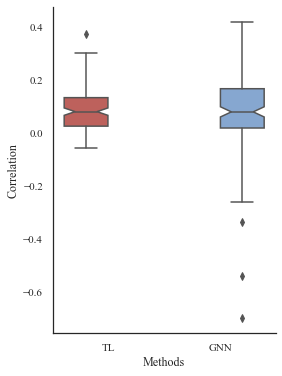

In [687]:
mse, ev, corr = [],[], []
for df in [tlgnndrav, dravgnndf]:
    ev += df.explained_variance.tolist()
    corr +=df["corr"].tolist()

dftlplot = pd.DataFrame()
dftlplot["Values"] = ev +corr
dftlplot["Metrics"] = np.repeat(["EV", "CORR"], len(ev))
dftlplot["Methods"] = np.repeat(["TL", "GNN"],dravgnndf.shape[0]).tolist()*2

## plot all them out
sns.set(rc={'figure.figsize':(4,6)})
sns.set_theme(style="white", palette=sns.color_palette(colors[3:5]), font="times new roman", rc=custom_params, font_scale=1)
g = sns.boxplot(data=dftlplot[dftlplot["Metrics"]=="EV"], y="Values", hue = "Methods", x = "Methods", notch=True, whis=2)
g.set_ylabel("Correlation")
g.legend("", frameon=False)